Date Created: Apr 6, 2022 @ 11:47 mst

---

## **Overview:**


The notebook is outlined as follows:

    RK4

    Part 1: Lorenz System
        
    Part 2: Chen System
    
    Part 3: Genesio system
    
    Part 4: Coupled Data 
    
    Links
    
    References 


In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA

%matplotlib notebook 

---

## RK4:

In [2]:
def RK4(t, x, y, z, equation_1, equation_2, equation_3, dt):

    k1[0] = dt*equation_1(t, x, y, z)
    k1[1] = dt*equation_2(t, x, y, z)
    k1[2] = dt*equation_3(t, x, y, z)

    k2[0] = dt*equation_1(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)
    k2[1] = dt*equation_2(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)
    k2[2] = dt*equation_3(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)

    k3[0] = dt*equation_1(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)
    k3[1] = dt*equation_2(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)
    k3[2] = dt*equation_3(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)

    k4[0] = dt*equation_1(t + dt, x + k3[0], y + k3[1], z + k3[2])
    k4[1] = dt*equation_2(t + dt, x + k3[0], y + k3[1], z + k3[2])
    k4[2] = dt*equation_3(t + dt, x + k3[0], y + k3[1], z + k3[2])

    x = x + (1./6.)*(k1[0] + 2.*k2[0] + 2.*k3[0] + k4[0])
    y = y + (1./6.)*(k1[1] + 2.*k2[1] + 2.*k3[1] + k4[1])
    z = z + (1./6.)*(k1[2] + 2.*k2[2] + 2.*k3[2] + k4[2])

    return np.array([x, y, z, t])

---

## Part 1: Lorenz System

Summary: Model of the Lorenz System approximated using the 4th-order Runge-Kutta method.

---

In [3]:
x = 1
y = 2
z = 3


t0 = 0.
tf = 100.
dt = 0.01
tmax = 100.
vector_t = np.arange(t0, tmax, dt) # time scale
n = len(vector_t)

rho = 28.  # check wiki page for info of rho depencancy/interesting values
sigma = 10.
beta = 8./3.


k1 = np.array([0., 0., 0.])
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])


def equation_1(t, x, y, z):
    return sigma*(y - x)


def equation_2(t, x, y, z):
    return rho*x - y - x*z


def equation_3(t, x, y, z):
    return x*y - beta*z

#### Collecting Data

In [4]:
rk4_data_lorenz = np.zeros((n, 4)) # setting initial conditions
rk4_data_lorenz[0, 0] = x
rk4_data_lorenz[0, 1] = y
rk4_data_lorenz[0, 2] = z
rk4_data_lorenz[0, 3] = vector_t[0]


for i in range(n-1): # loop the stages over i
    rk4_data_lorenz[i+1, :] = RK4(vector_t[i], rk4_data_lorenz[i, 0], rk4_data_lorenz[i, 1],
                       rk4_data_lorenz[i, 2], equation_1, equation_2, equation_3, dt)

    
print(rk4_data_lorenz[:10, :])

[[1.         2.         3.         0.        ]
 [1.10668018 2.24217232 2.94309092 0.        ]
 [1.22751058 2.51086379 2.89299937 0.01      ]
 [1.36383363 2.80953945 2.85086486 0.02      ]
 [1.51720808 3.14196668 2.81812275 0.03      ]
 [1.6894189  3.51224936 2.79657619 0.04      ]
 [1.88248919 3.92485658 2.78848524 0.05      ]
 [2.09869337 4.38464332 2.79667659 0.06      ]
 [2.34057049 4.8968588  2.82467831 0.07      ]
 [2.61093629 5.46713654 2.87688393 0.08      ]]


#### Plotting Lorenz System

<IPython.core.display.Javascript object>


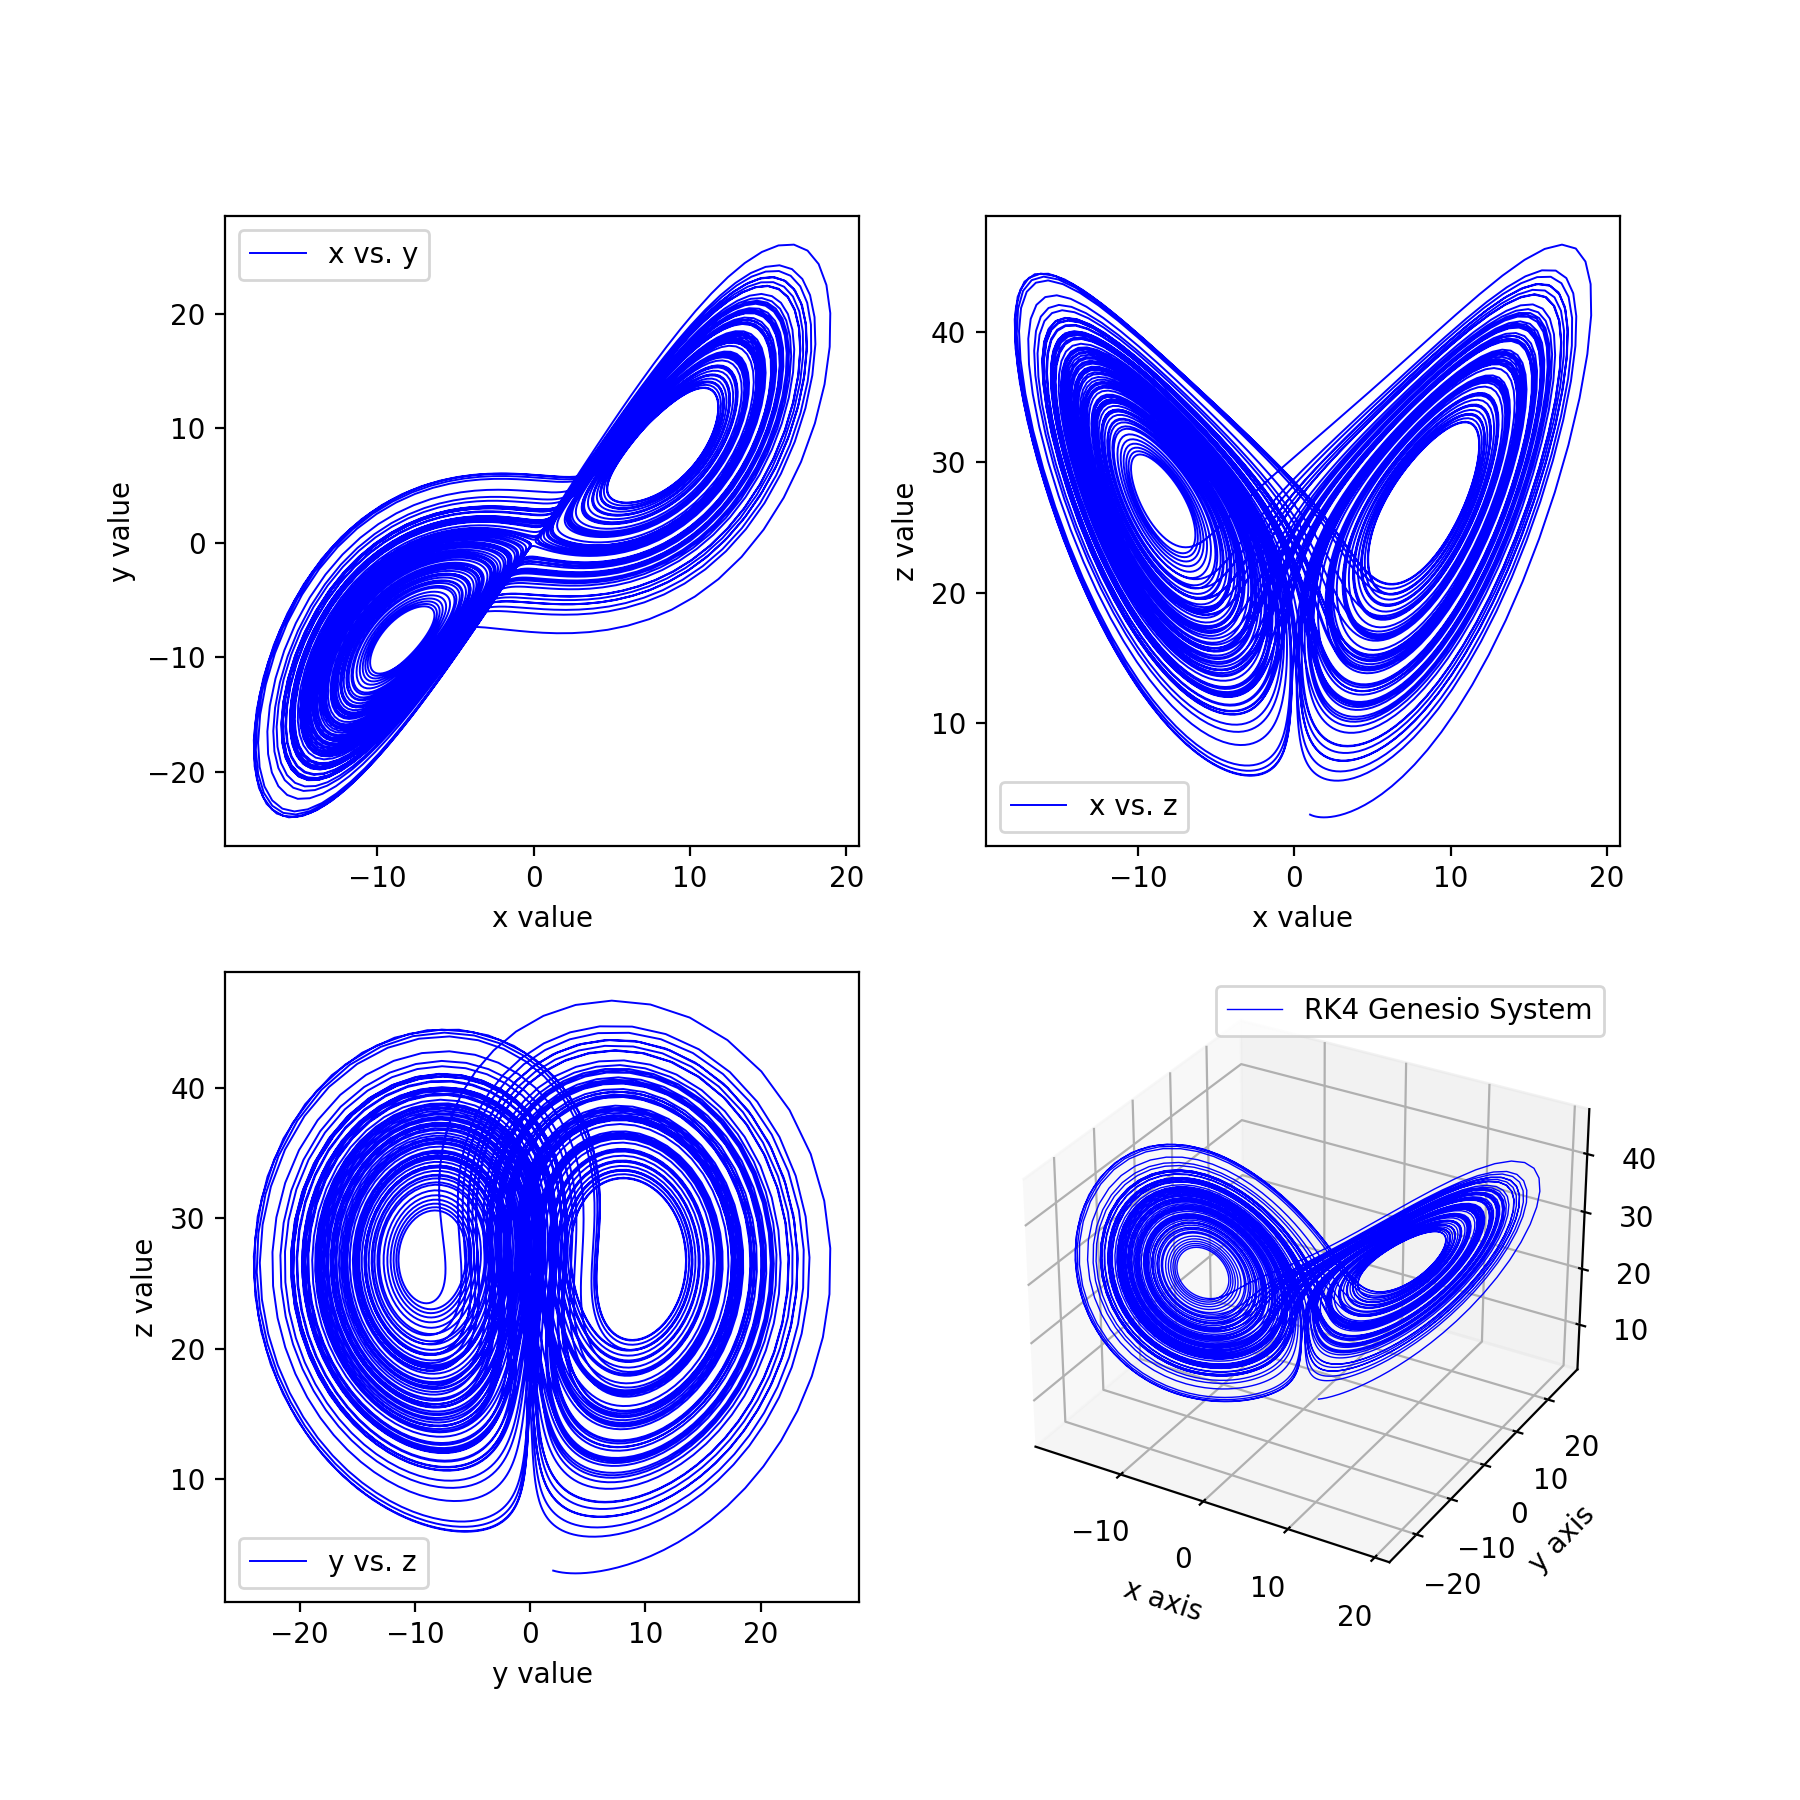

In [5]:
plt.figure("Lorenz System Plots", figsize=(9,9))

plt.subplot(221)
plt.ylabel('y value')
plt.xlabel('x value')
plt.plot(rk4_data_lorenz[:i, 0], rk4_data_lorenz[:i, 1], 
                                     color='b', label='x vs. y', linewidth='0.7')
plt.legend() 

plt.subplot(222)
plt.ylabel('z value')
plt.xlabel('x value')
plt.plot(rk4_data_lorenz[:i, 0], rk4_data_lorenz[:i, 2], 
                                     color='b', label='x vs. z', linewidth='0.7')
plt.legend()

plt.subplot(223)
plt.ylabel('z value')
plt.xlabel('y value')
plt.plot(rk4_data_lorenz[:i, 1], rk4_data_lorenz[:i, 2], 
                                     color='b', label='y vs. z', linewidth='0.7')
plt.legend()

plt.subplot(224, projection='3d')
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.plot(rk4_data_lorenz[:i, 0], rk4_data_lorenz[:i, 1], rk4_data_lorenz[:i, 2], 
                                      color='b', label='RK4 Genesio System', linewidth='0.5')
plt.legend()

plt.show() 

<IPython.core.display.Javascript object>


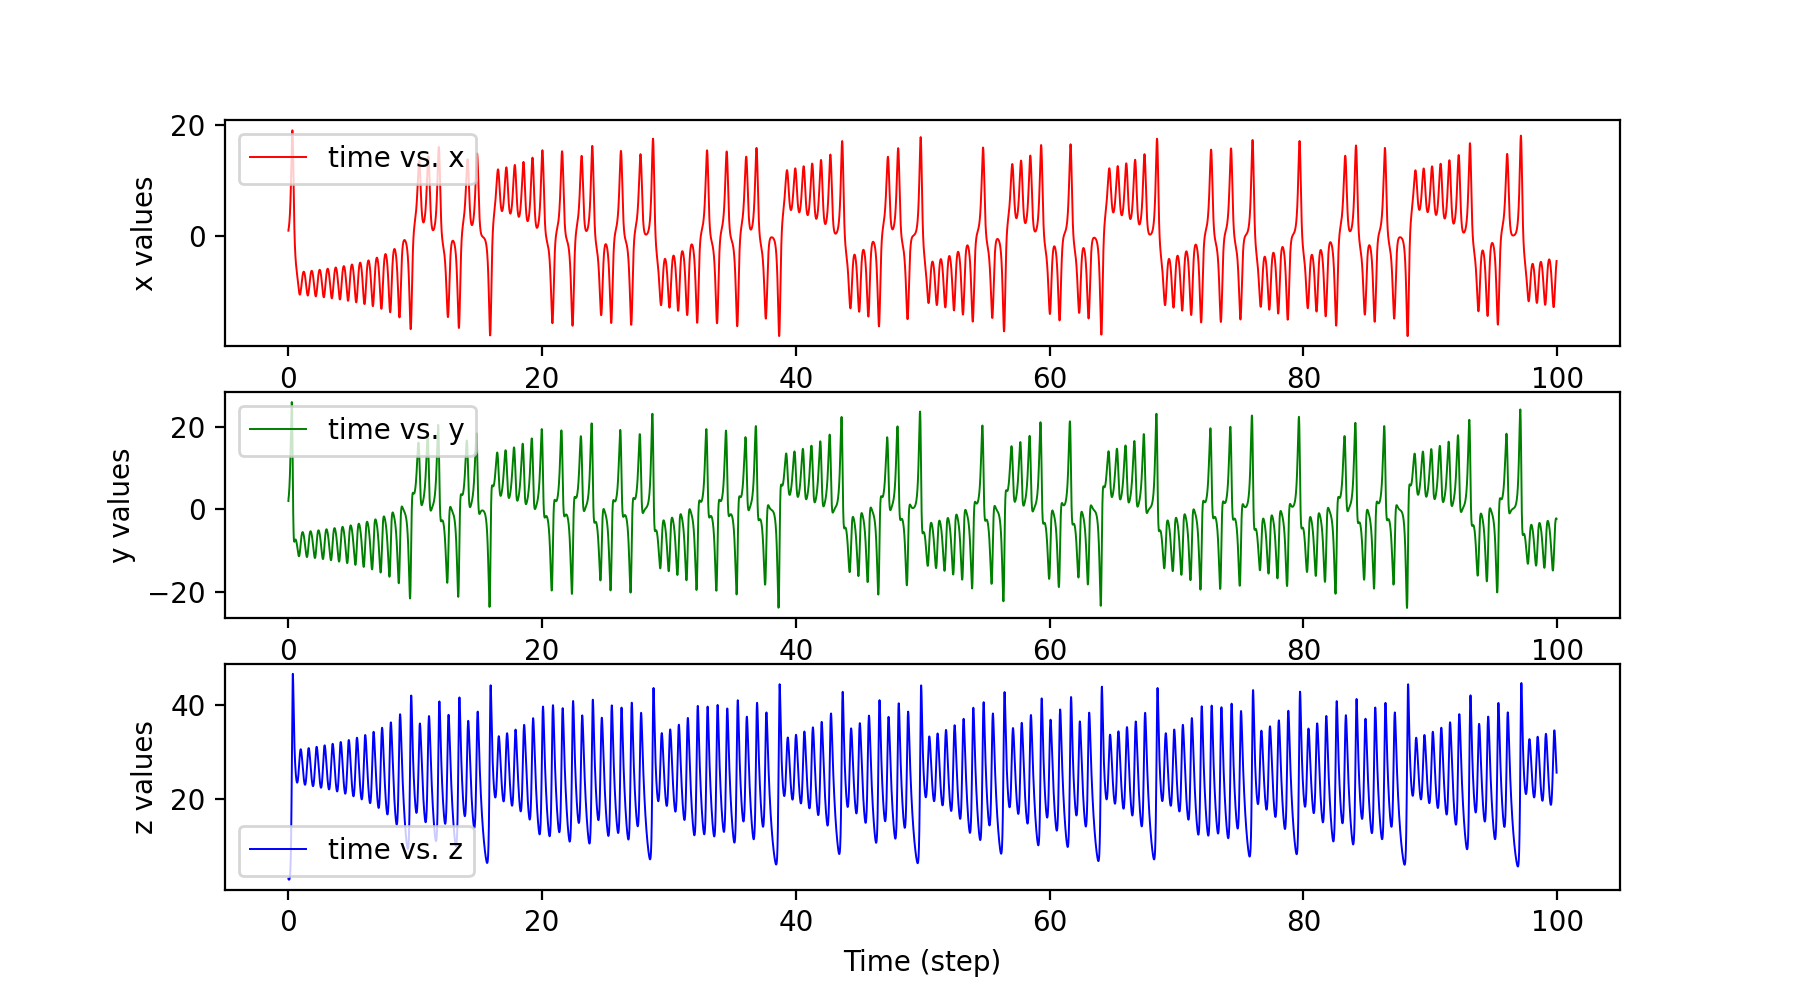

In [6]:
plt.figure("Lorenz System Time Plots", figsize=(9,5))

plt.subplot(311)
plt.plot(rk4_data_lorenz[:i, 3], rk4_data_lorenz[:i, 0], 
                                     color='r', label="time vs. x", linewidth='0.7')
plt.ylabel('x values')
plt.legend()

plt.subplot(312)
plt.plot(rk4_data_lorenz[:i, 3], rk4_data_lorenz[:i, 1], 
                                     color='g', label="time vs. y", linewidth='0.7')
plt.ylabel('y values')
plt.legend()

plt.subplot(313)
plt.plot(rk4_data_lorenz[:i, 3], rk4_data_lorenz[:i, 2], 
                                     color='b', label="time vs. z", linewidth='0.7')
plt.ylabel('z values')
plt.xlabel('Time (step)')
plt.legend()

plt.show()

---

## Part 2: Chen System

Summary: Model of the Chen System approximated using the 4th-order Runge-Kutta method.

---

In [7]:
x = 1
y = 1
z = 1

t0 = 0.
tf = 100.
dt = 0.01
tmax = 100.
vector_t = np.arange(t0, tmax, dt)
n = len(vector_t)

rho = 28.
sigma = 40.
beta = 3.

k1 = np.array([0., 0., 0.])
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])


def equation_1(t, x, y, z):
    return sigma*(y - x)


def equation_2(t, x, y, z):
    return (rho - sigma)*x - x*z + rho*y


def equation_3(t, x, y, z):
    return x*y - beta*z

#### Collecting Chen System Data

In [8]:
rk4_data_chen = np.zeros((n, 4))
rk4_data_chen[0, 0] = x
rk4_data_chen[0, 1] = y
rk4_data_chen[0, 2] = z
rk4_data_chen[0, 3] = vector_t[0]


for i in range(n - 1):
    rk4_data_chen[i+1, :] = RK4(vector_t[i], rk4_data_chen[i, 0], rk4_data_chen[i, 1],
                       rk4_data_chen[i, 2], equation_1, equation_2, equation_3, dt)

#### Plotting Chen System

<IPython.core.display.Javascript object>


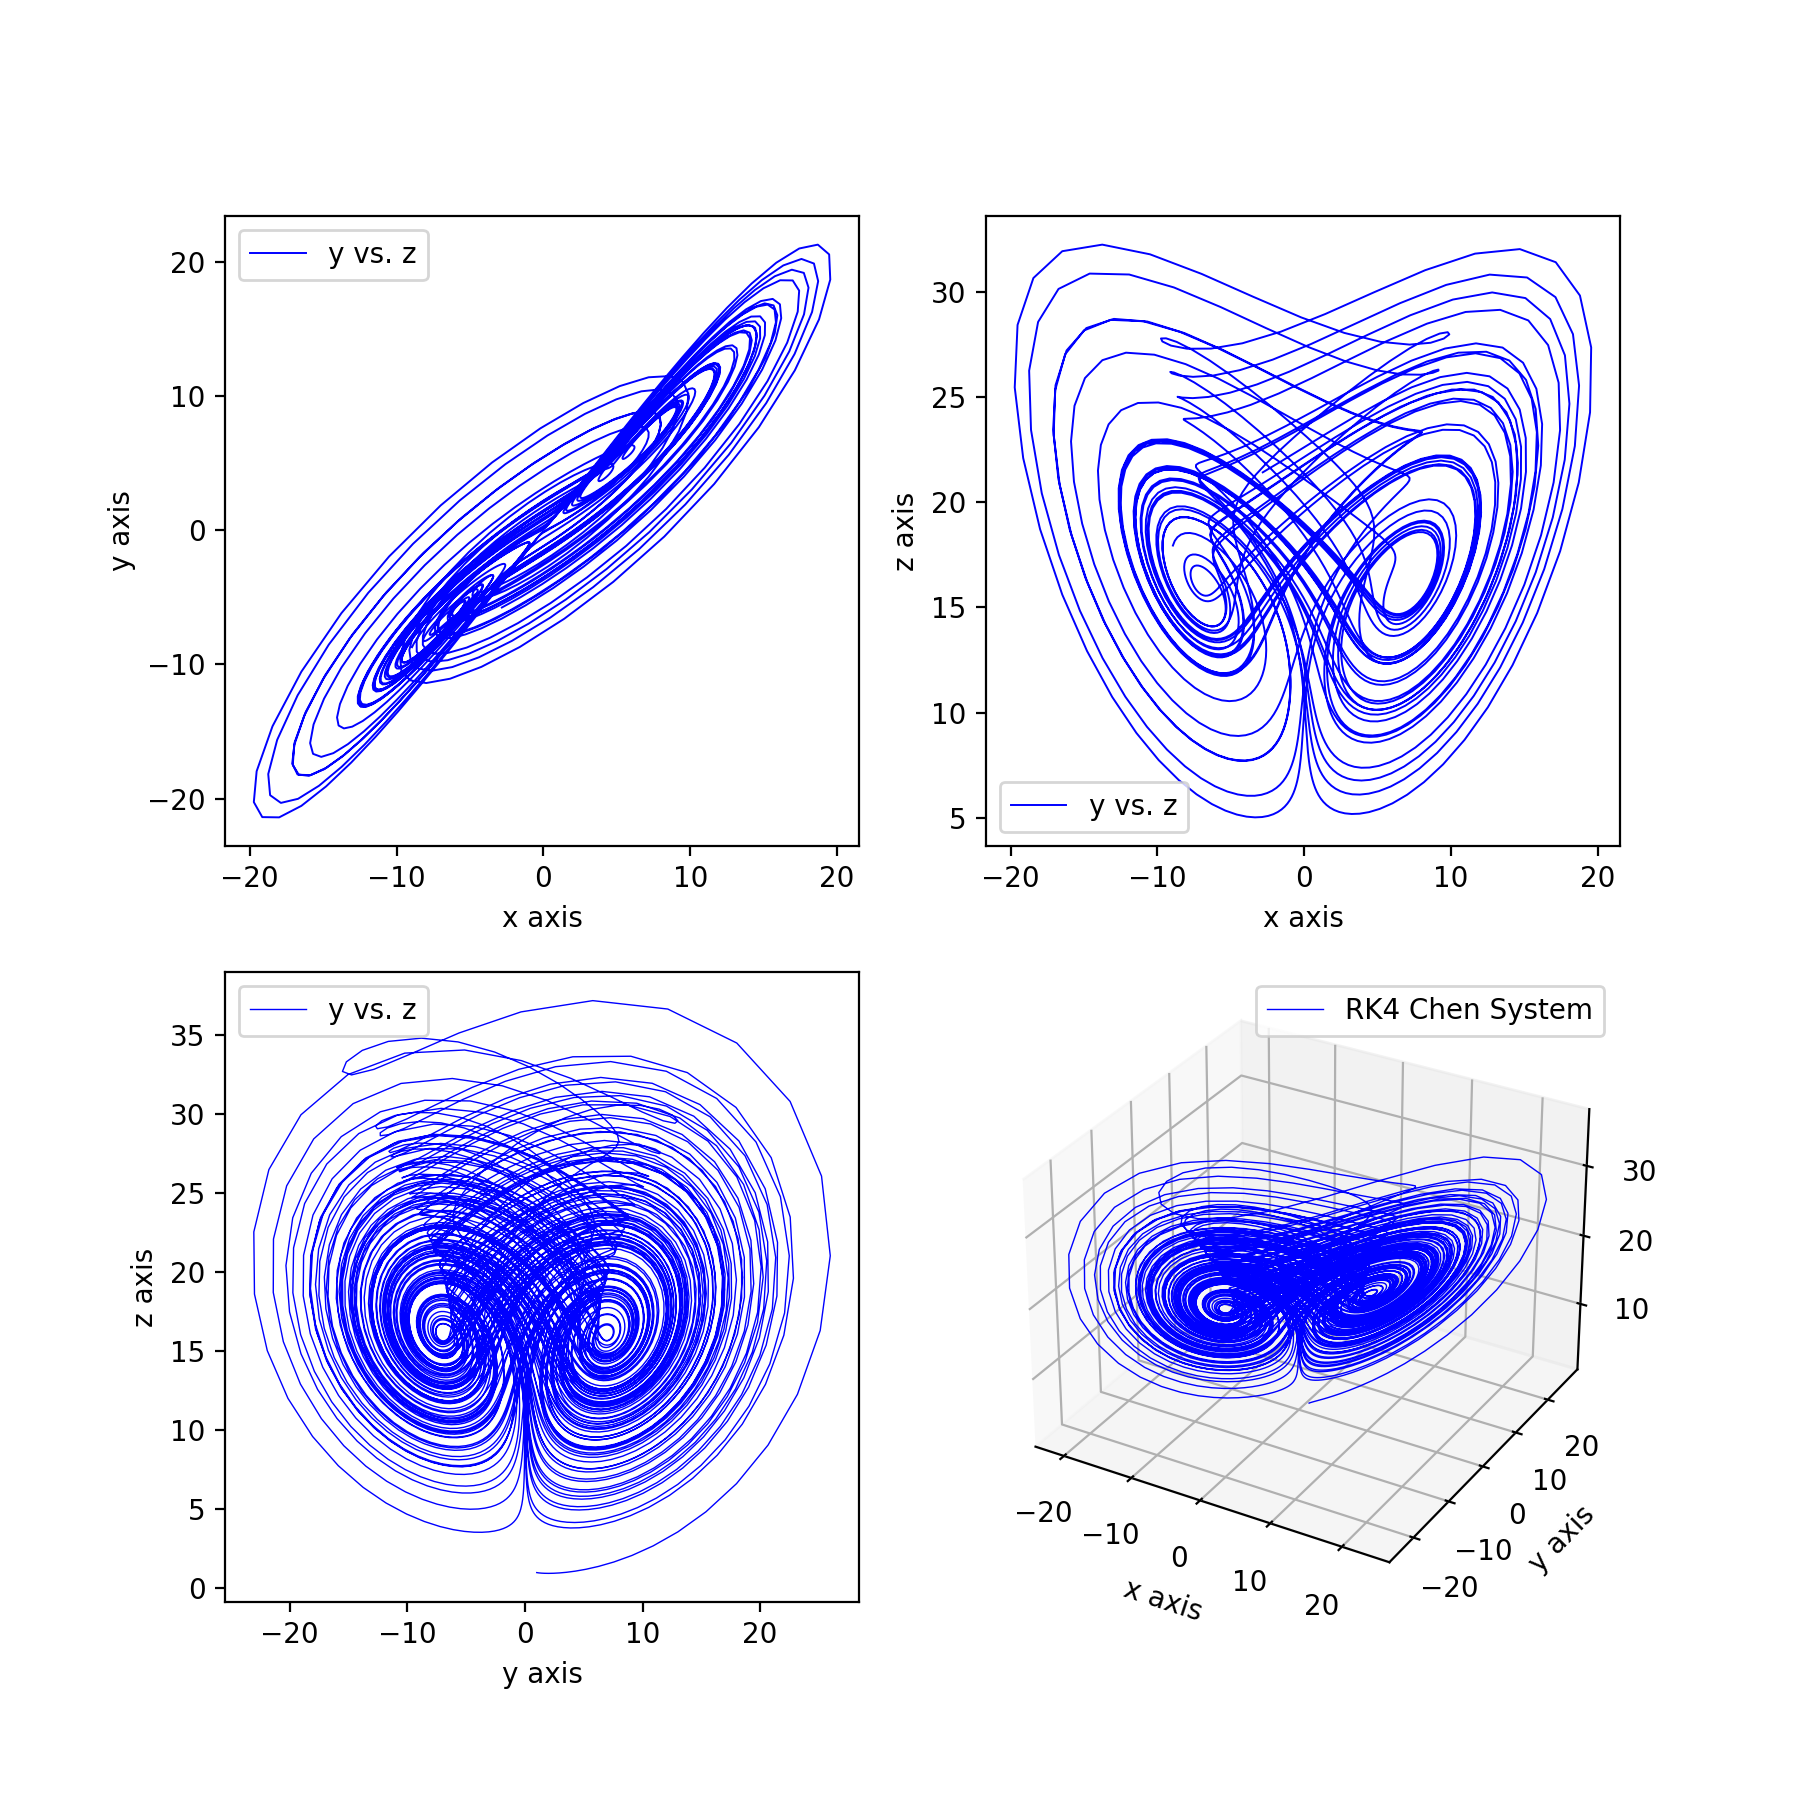

In [9]:
plt.figure("Chen System Plots", figsize=(9,9))

plt.subplot(221)
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.plot(rk4_data_chen[7000:i, 0], rk4_data_chen[7000:i, 1], 
                                     color='b', label='y vs. z', linewidth='0.7')
plt.legend()

plt.subplot(222)
plt.ylabel('z axis')
plt.xlabel('x axis')
plt.plot(rk4_data_chen[7000:i, 0], rk4_data_chen[7000:i, 2], 
                                     color='b', label='y vs. z', linewidth='0.7')
plt.legend()

plt.subplot(223)
plt.ylabel('z axis')
plt.xlabel('y axis')
plt.plot(rk4_data_chen[:i, 1], rk4_data_chen[:i, 2], 
                                     color='b', label='y vs. z', linewidth='0.5')
plt.legend()

plt.subplot(224, projection='3d')
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.plot(rk4_data_chen[:i, 0], rk4_data_chen[:i, 1], rk4_data_chen[:i, 2], 
                                      color='b', label='RK4 Chen System', linewidth='0.5')
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


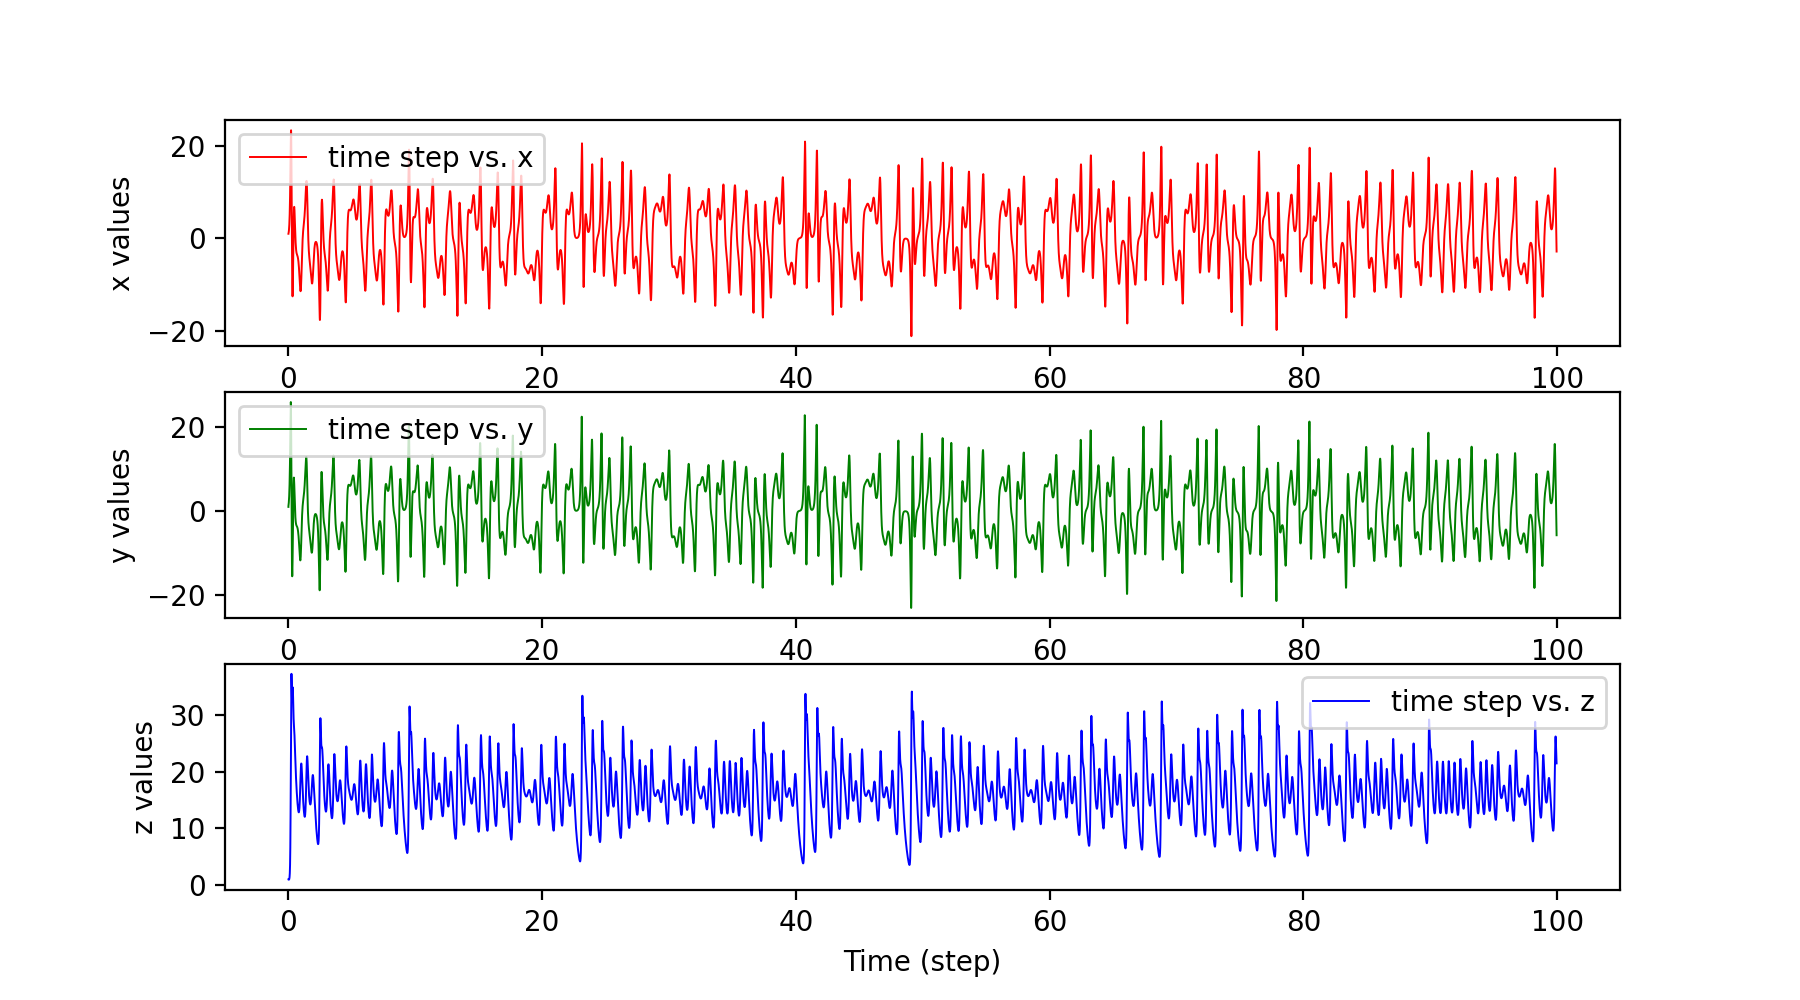

In [10]:
plt.figure("Chen System Time Plots", figsize=(9,5))

plt.subplot(311)
plt.plot(rk4_data_chen[:i, 3], rk4_data_chen[:i, 0], 
                             color='r', label="time step vs. x", linewidth='0.7')
plt.ylabel('x values')
plt.legend()

plt.subplot(312)
plt.plot(rk4_data_chen[:i, 3], rk4_data_chen[:i, 1], 
                             color='g', label="time step vs. y", linewidth='0.7')
plt.ylabel('y values')
plt.legend()

plt.subplot(313)
plt.plot(rk4_data_chen[:i, 3], rk4_data_chen[:i, 2], 
                             color='b', label="time step vs. z", linewidth='0.7')
plt.ylabel('z values')
plt.xlabel('Time (step)')
plt.legend()

plt.show()

---

# Part 3: Genesio System

Summary: Model of the Genesio System approximated using the 4th-order Runge-Kutta method.

---

In [11]:
x = 0.2
y = -0.3
z = 0.1

t0 = 0.
tf = 100.
dt = 0.01 
tmax = 100.
vector_t = np.arange(t0, tmax, dt)
n = len(vector_t)

rho = 1.
sigma = 1.
beta = 1.


k1 = np.array([0., 0., 0.])
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])


def equation_1(t, x, y, z):
    return y


def equation_2(t, x, y, z):
    return z


def equation_3(t, x, y, z):
    return -rho*x - beta*y - sigma*z + x**2

#### Collecting Genesio System Data

In [12]:
rk4_data_genesio = np.zeros((n, 4))
rk4_data_genesio[0, 0] = x
rk4_data_genesio[0, 1] = y
rk4_data_genesio[0, 2] = z
rk4_data_genesio[0, 3] = vector_t[0]


for i in range(n - 1): 
    rk4_data_genesio[i+1, :] = RK4(vector_t[i], rk4_data_genesio[i, 0], rk4_data_genesio[i, 1],
                       rk4_data_genesio[i, 2], equation_1, equation_2, equation_3, dt)

#### Plotting Chen System 

<IPython.core.display.Javascript object>


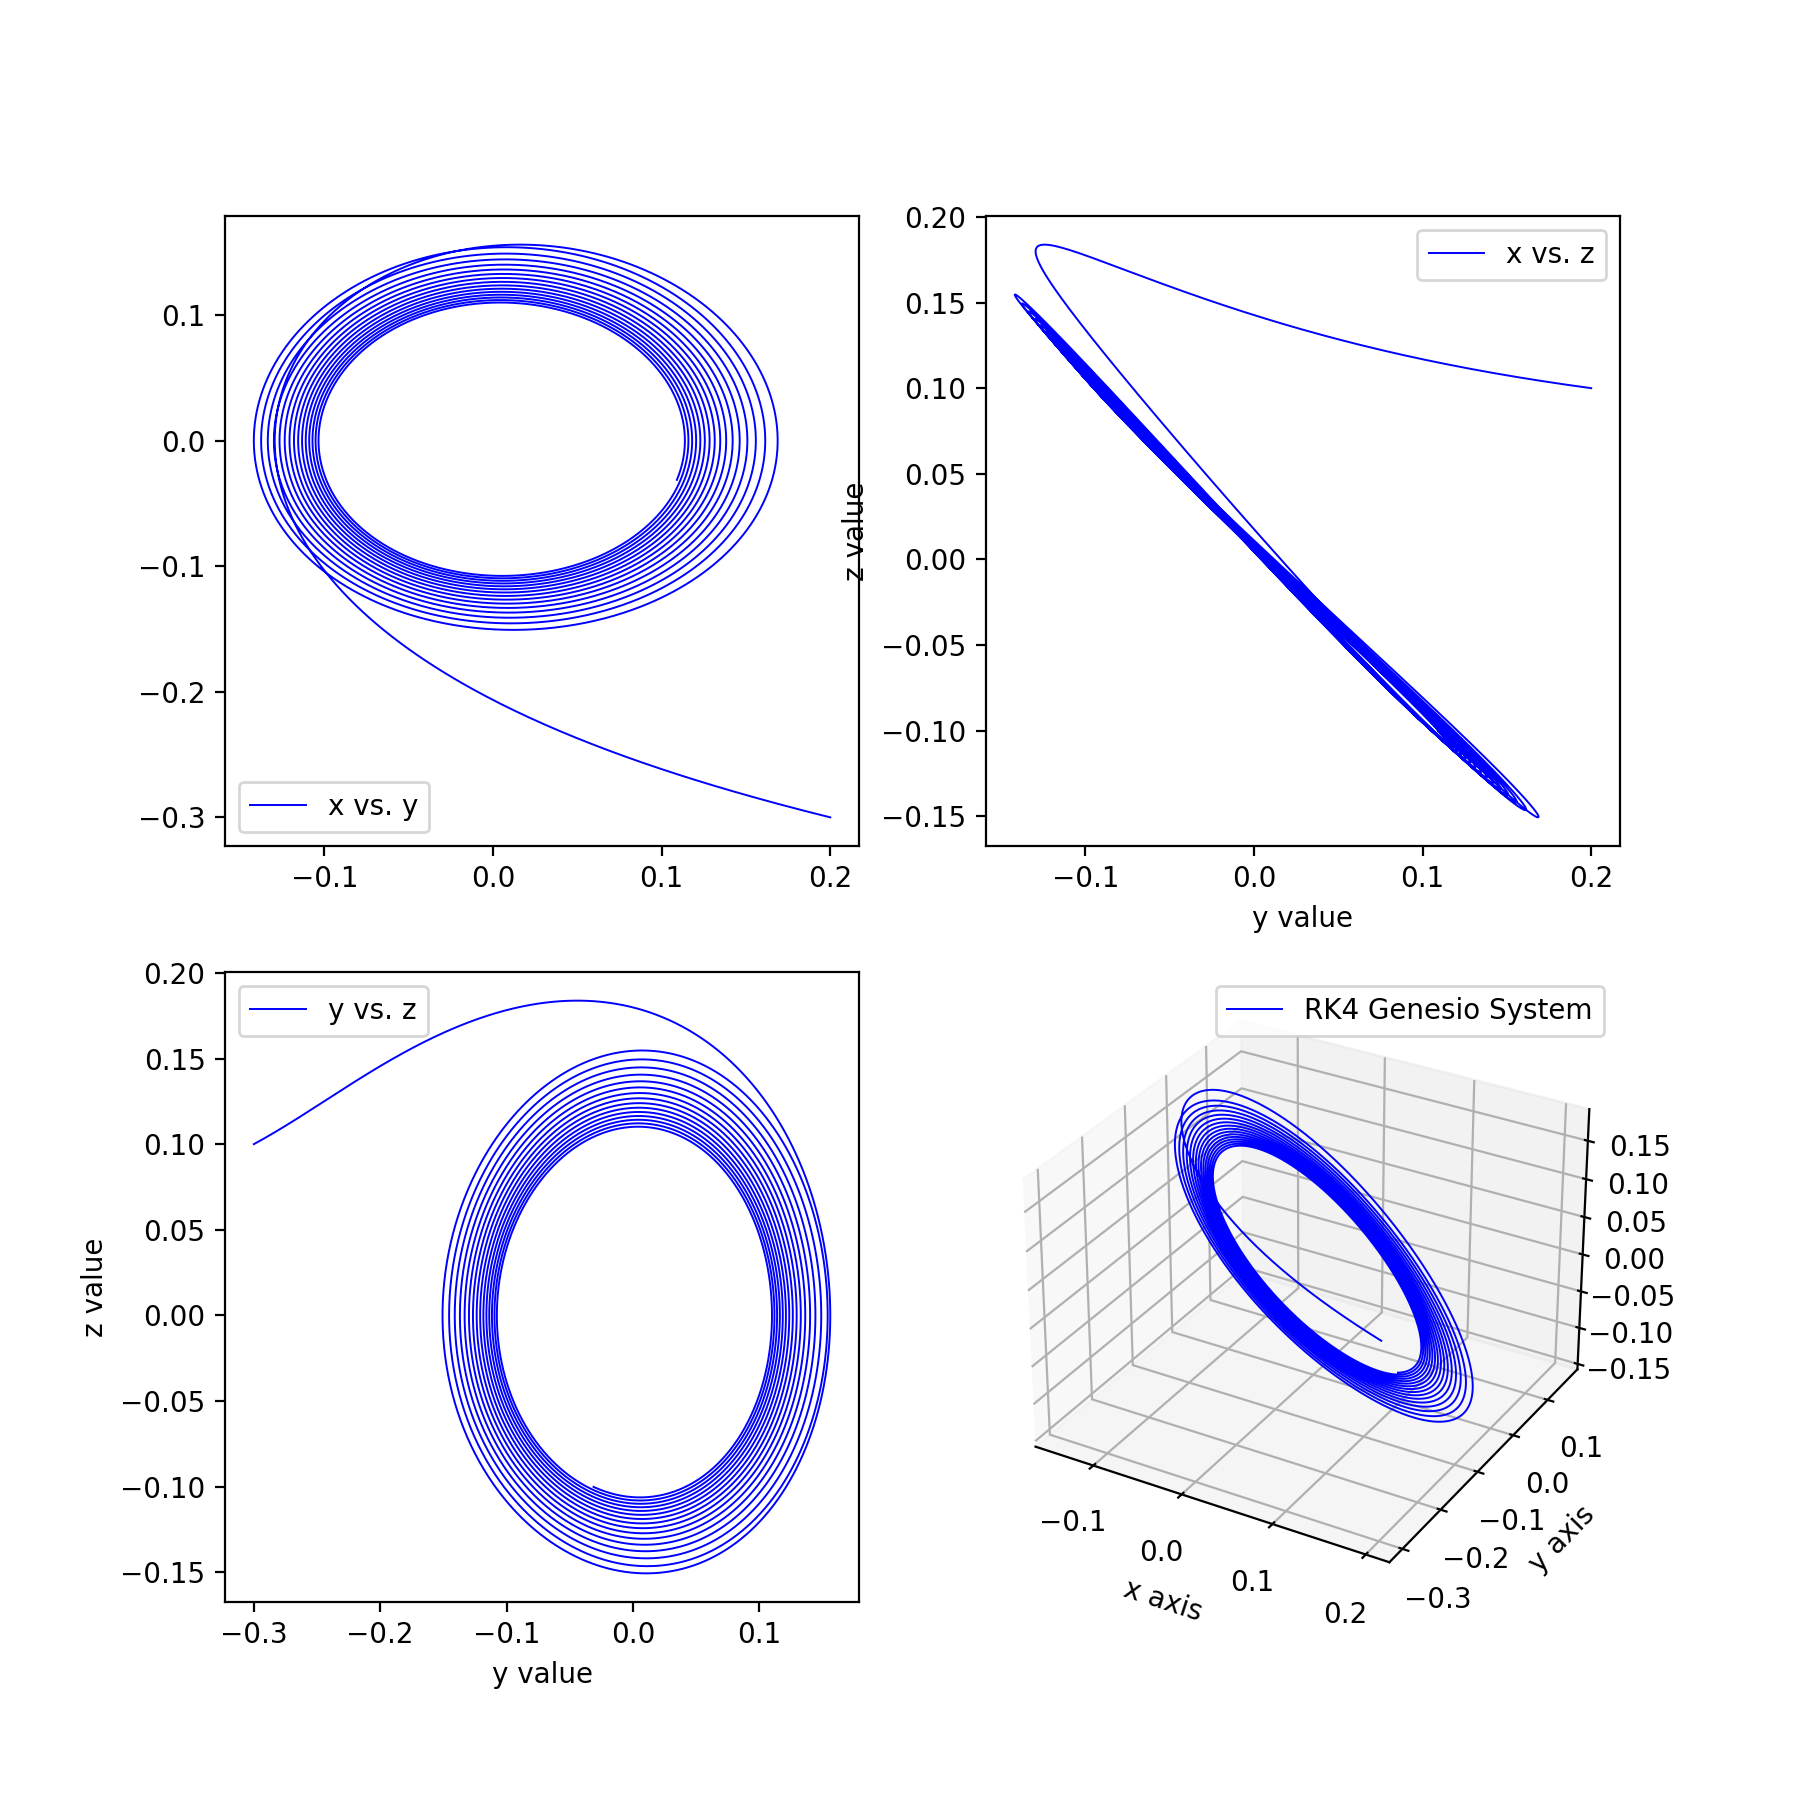

In [13]:
plt.figure("Genesio System Plots", figsize=(9,9))

plt.subplot(221)
plt.plot(rk4_data_genesio[:i, 0], rk4_data_genesio[:i, 1], 
                                     color='b', label='x vs. y', linewidth='0.7')
plt.legend()

plt.subplot(222)
plt.ylabel('z value')
plt.xlabel('y value')
plt.plot(rk4_data_genesio[:i, 0], rk4_data_genesio[:i, 2], 
                                     color='b', label='x vs. z', linewidth='0.7')
plt.legend()

plt.subplot(223)
plt.ylabel('z value')
plt.xlabel('y value')
plt.plot(rk4_data_genesio[:i, 1], rk4_data_genesio[:i, 2], 
                                     color='b', label='y vs. z', linewidth='0.7')
plt.legend()

plt.subplot(224, projection='3d')
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.plot(rk4_data_genesio[:i, 0], rk4_data_genesio[:i, 1], rk4_data_genesio[:i, 2], 
                                      color='b', label='RK4 Genesio System', linewidth='0.7')
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


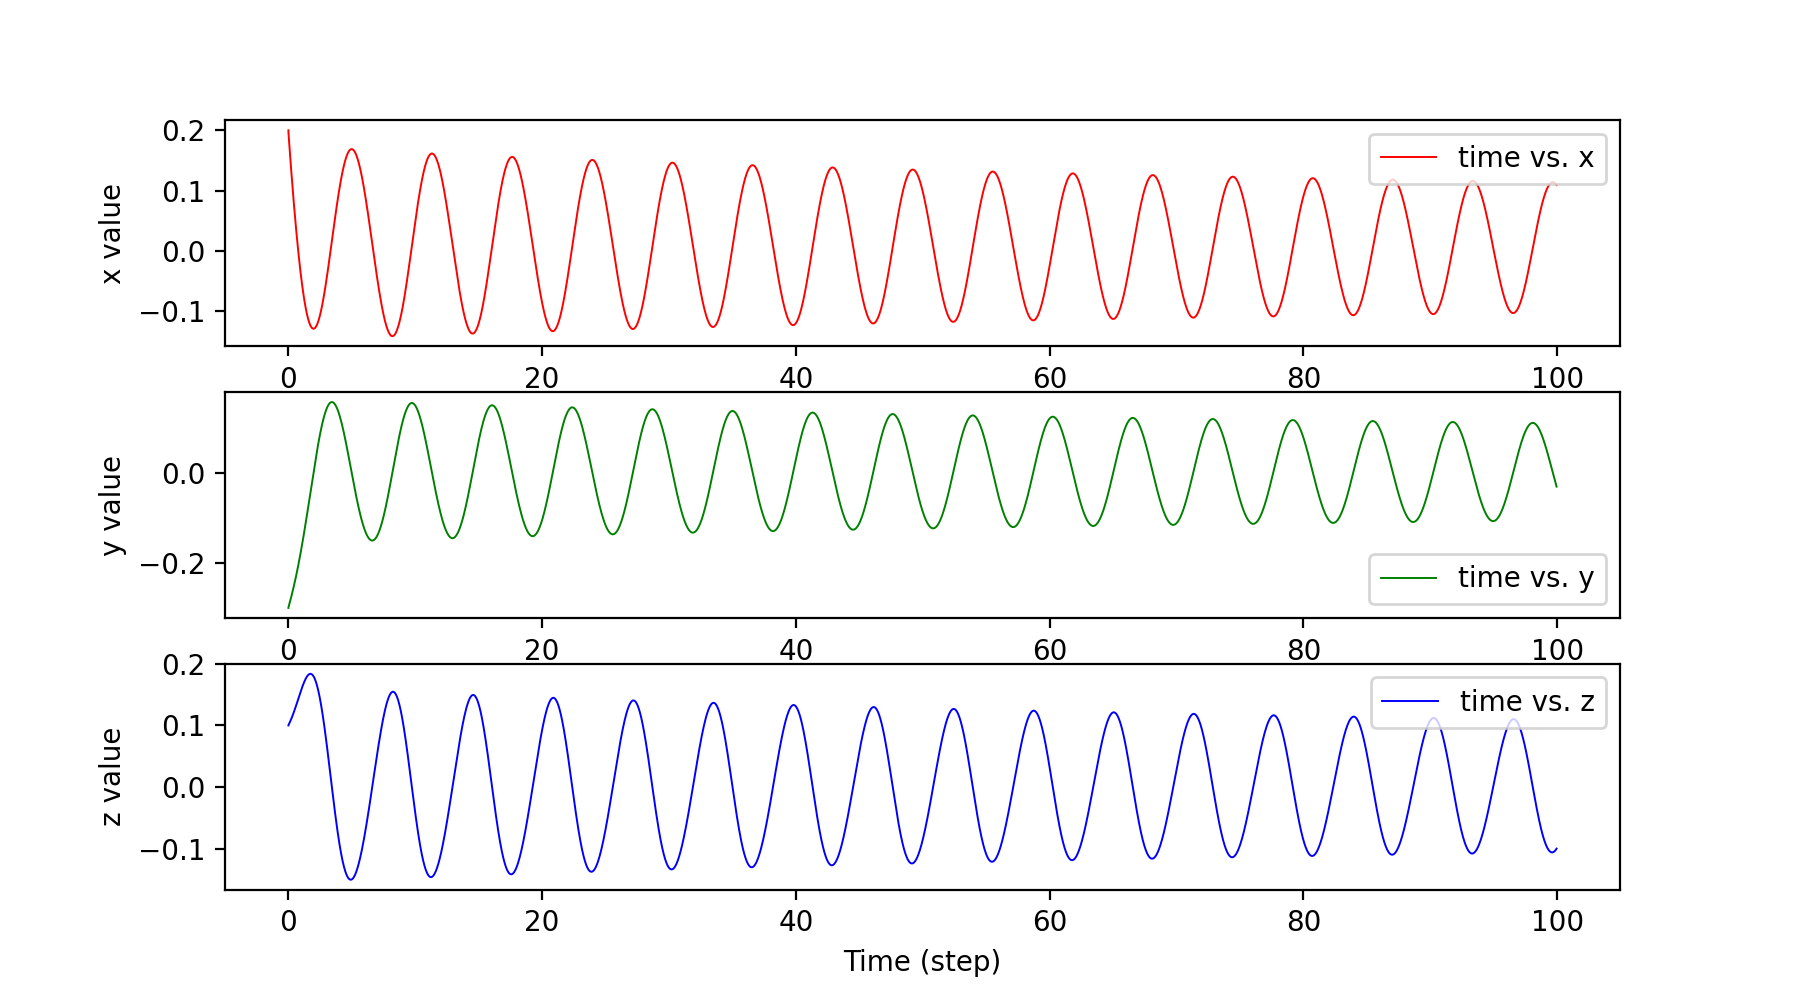

In [14]:
plt.figure(figsize=(9,5))

plt.subplot(311)
plt.plot(rk4_data_genesio[:i, 3], rk4_data_genesio[:i, 0], 
                             color='r', label="time vs. x", linewidth='0.7')
plt.ylabel('x value')
plt.legend()

plt.subplot(312)
plt.plot(rk4_data_genesio[:i, 3], rk4_data_genesio[:i, 1], 
                             color='g', label="time vs. y", linewidth='0.7')
plt.ylabel('y value')
plt.legend()

plt.subplot(313)
plt.plot(rk4_data_genesio[:i, 3], rk4_data_genesio[:i, 2], 
                             color='b', label="time vs. z", linewidth='0.7')
plt.ylabel('z value')
plt.xlabel('Time (step)')
plt.legend()

plt.show()

---

---

---

## Part 4: Couple Data

**NOTE:** 
    
    In Part 4... 

       - x values are the Lorenz System x-values from Part 1

       - y values are the Chen System y-values from Part 2

       - z values are the Genesio System z-values from Part 3


<IPython.core.display.Javascript object>


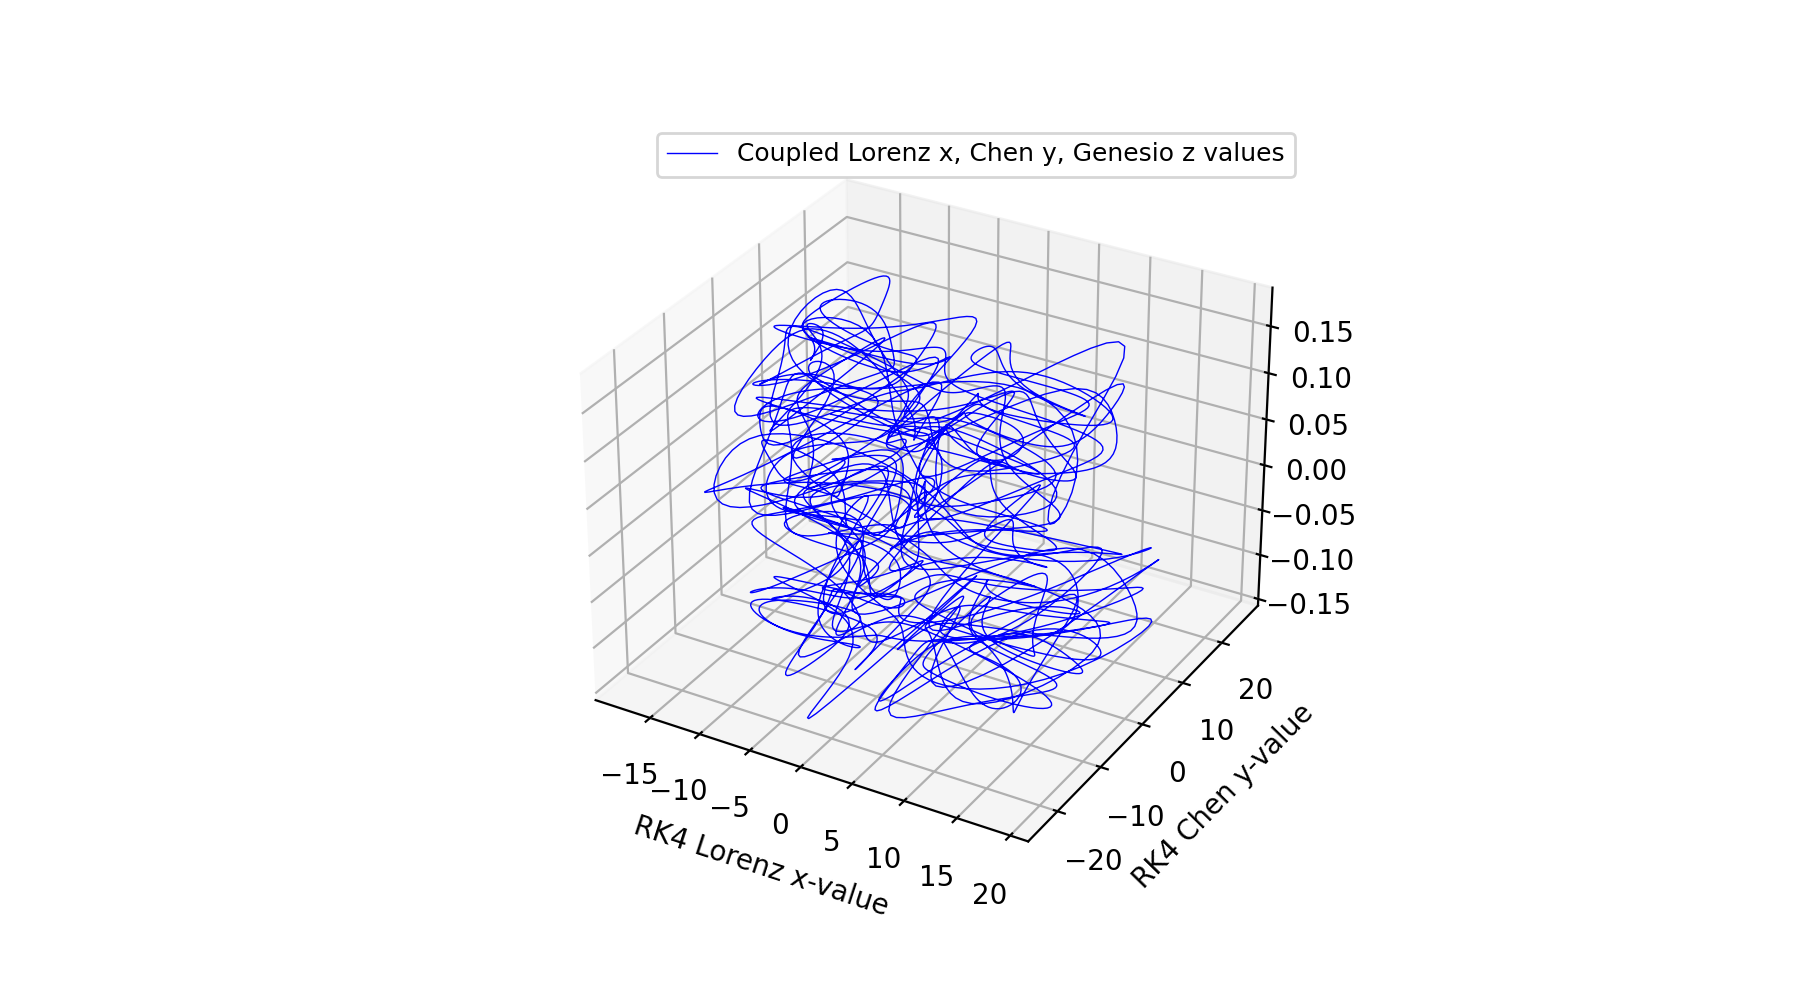

/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_25141/2348831233.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [23]:
fig = plt.figure('Coupled Data 3D Animated', figsize=(9, 5), dpi=100)
ax = fig.gca(projection='3d')


def animate(i):
    ax.clear()
    ax.set(facecolor='white')
    
    ax.plot(rk4_data_lorenz[:i, 0], rk4_data_chen[:i, 1], rk4_data_genesio[:i, 2],
            color='blue', lw=0.5, label='Coupled Lorenz x, Chen y, Genesio z values')
    plt.ylabel('RK4 Chen y-value')
    plt.xlabel('RK4 Lorenz x-value')
    ax.legend(fontsize=9)


ani = animation.FuncAnimation(fig, animate, np.arange(6000), interval=2, repeat=False)
plt.show()

<IPython.core.display.Javascript object>


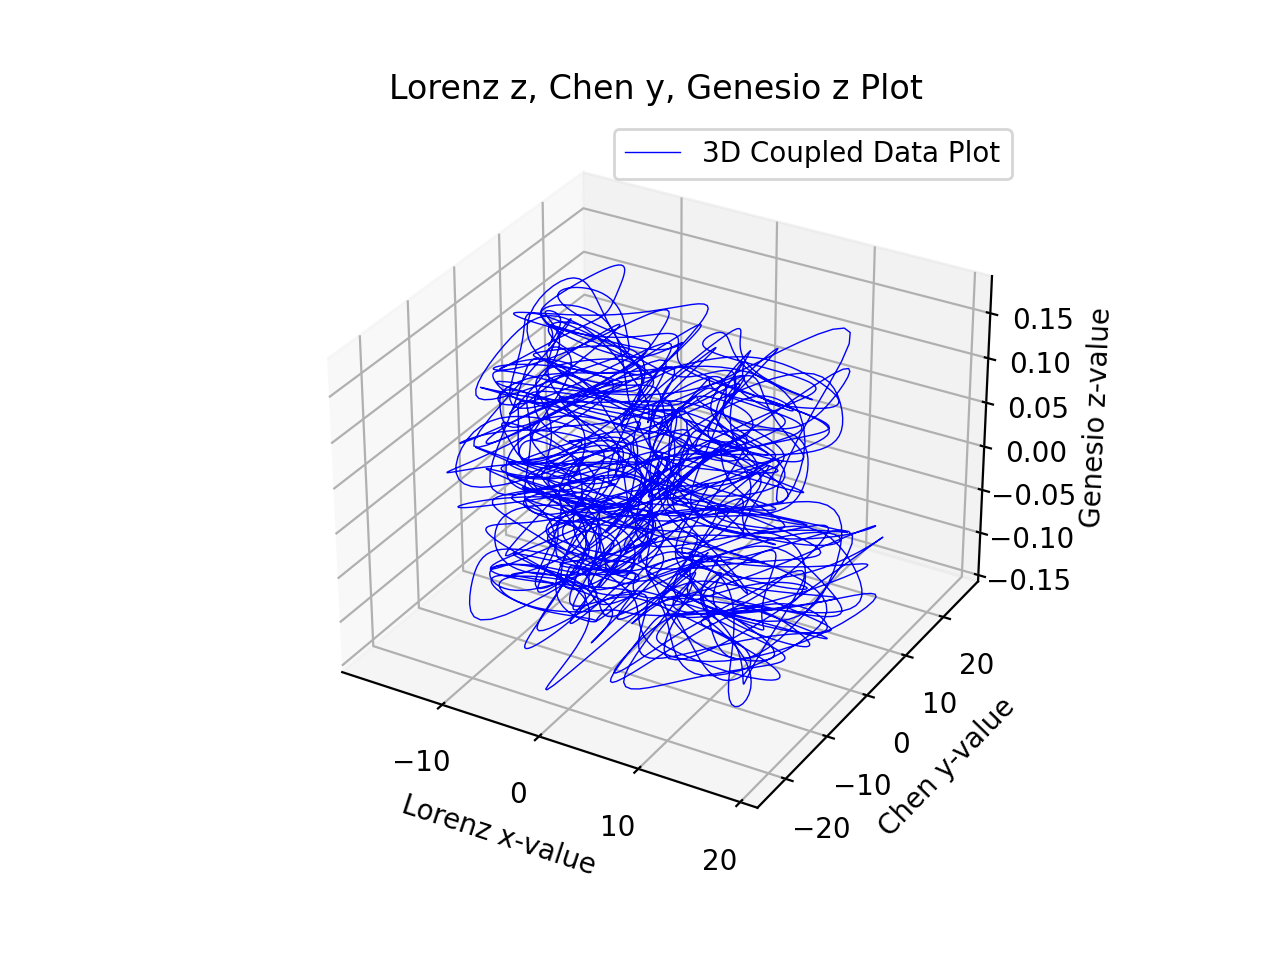

In [38]:
plt.figure()
ax = plt.axes(projection='3d')

ax.set_title('Lorenz z, Chen y, Genesio z Plot')
ax.set_xlabel('Lorenz x-value')
ax.set_ylabel('Chen y-value')
ax.set_zlabel('Genesio z-value')

plt.plot(rk4_data_lorenz[:i, 0], rk4_data_chen[:i, 1], rk4_data_genesio[:i, 2], 
                                color='b', label='3D Coupled Data Plot', linewidth='0.5')
plt.legend()

plt.savefig('Multi_Chaotic_3d.png')
plt.show()

<IPython.core.display.Javascript object>


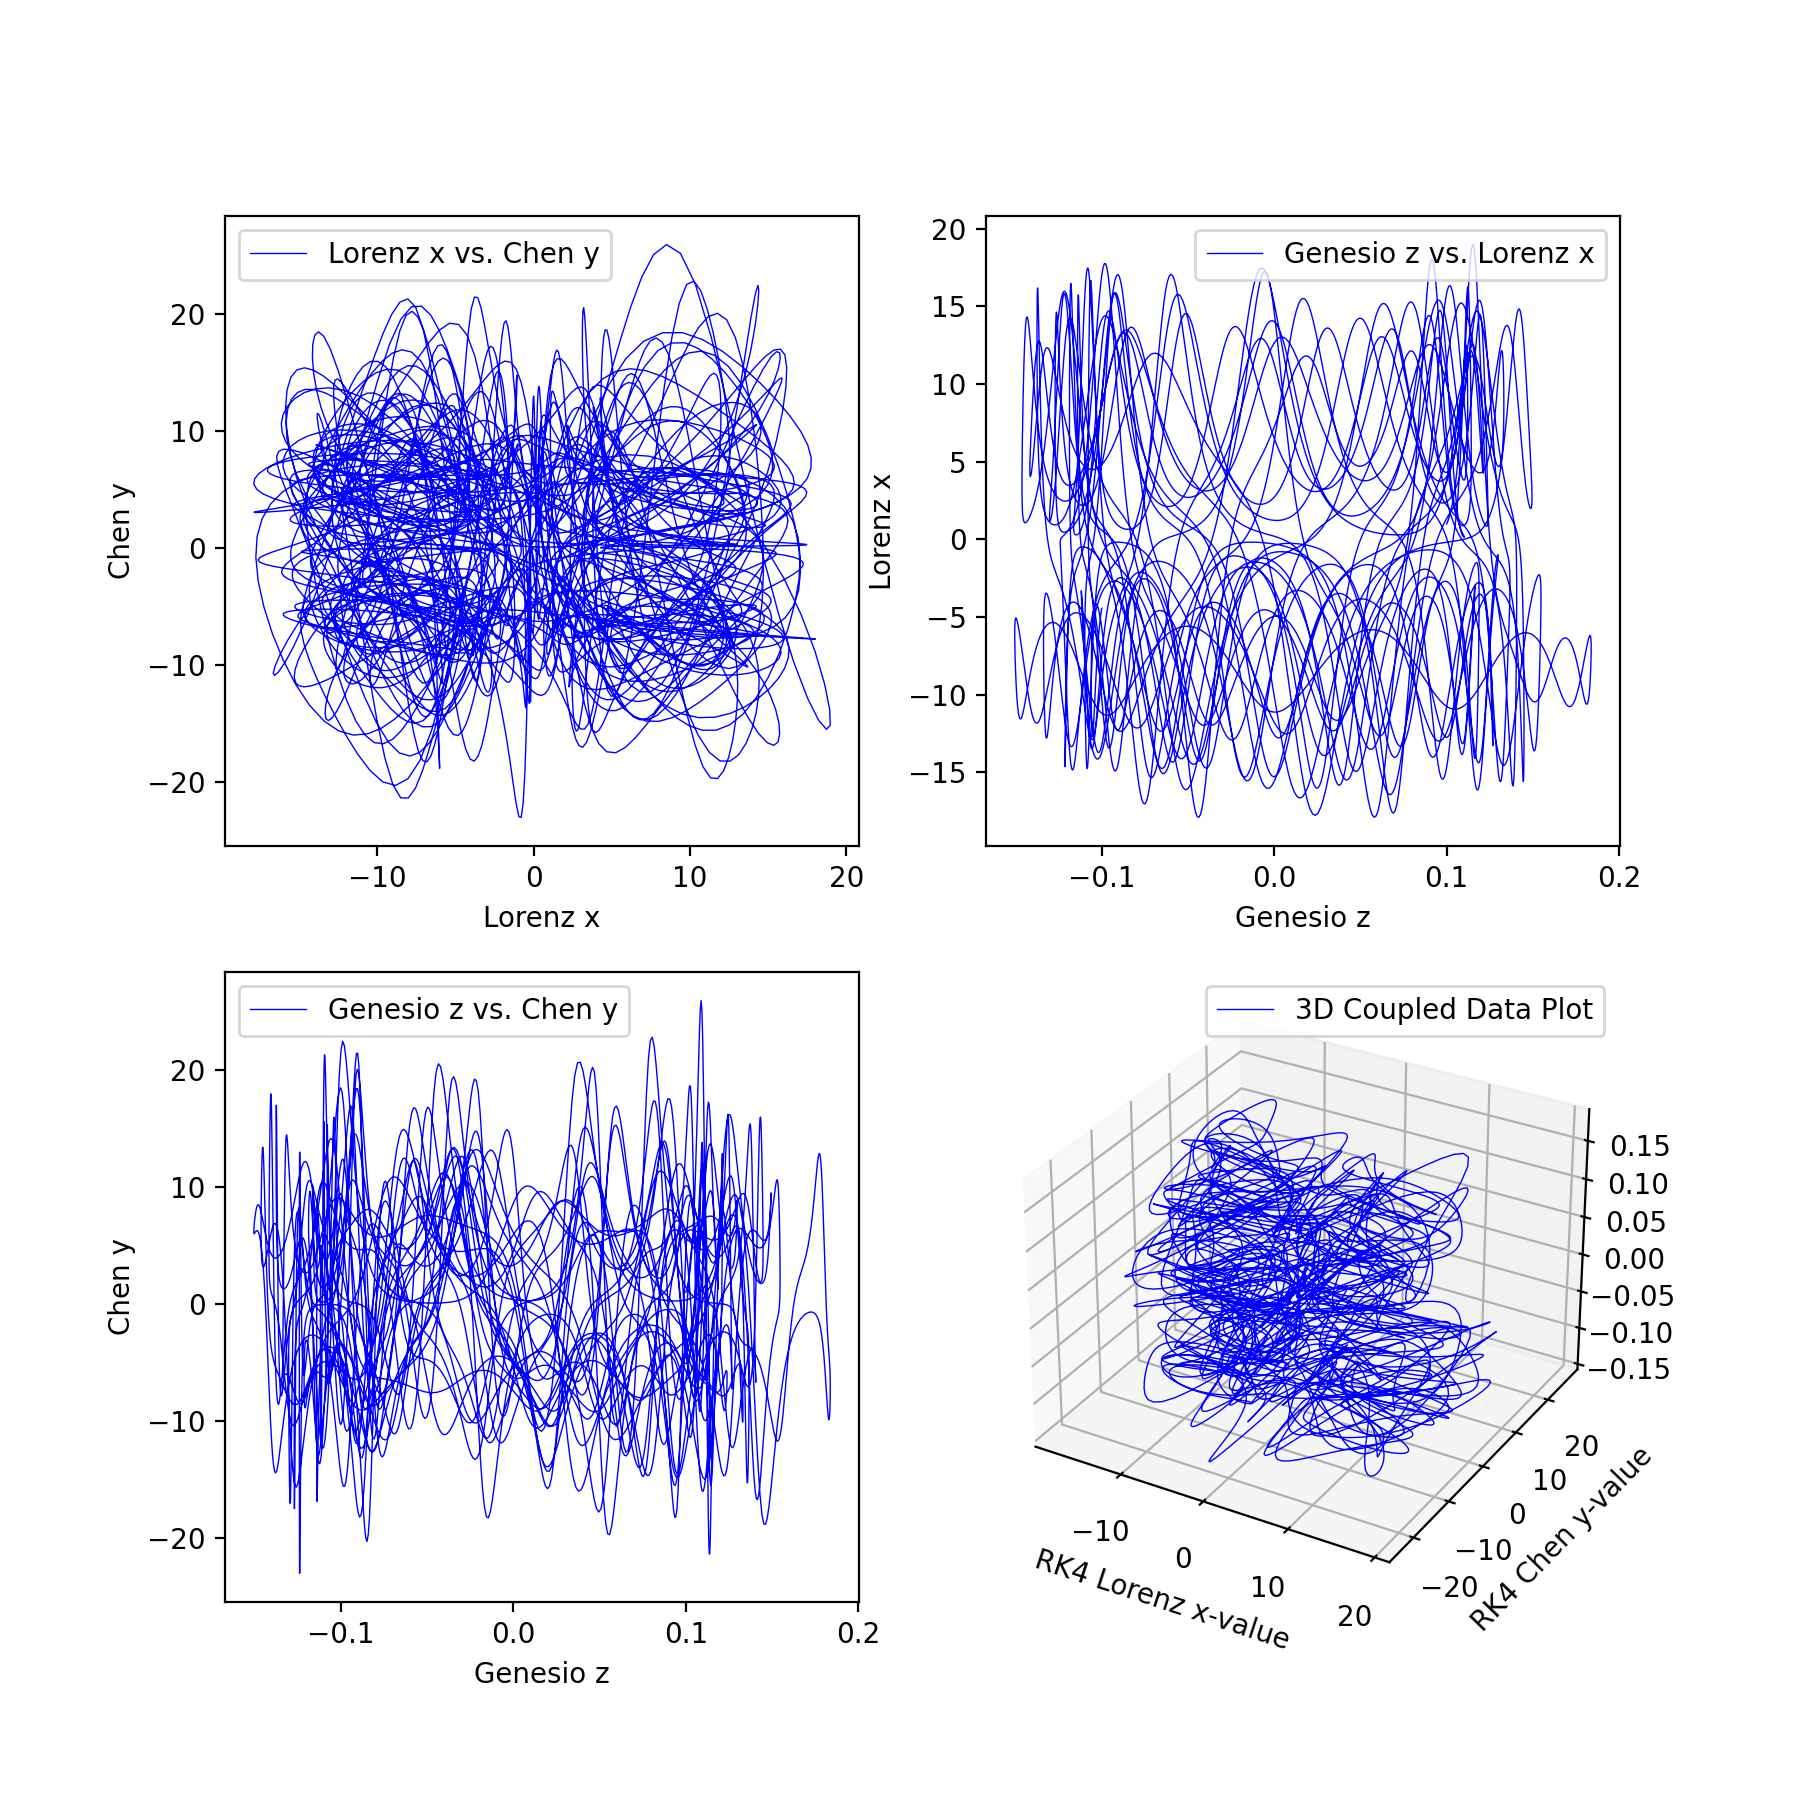

CPU times: user 1e+03 ns, sys: 3 µs, total: 4 µs
Wall time: 4.05 µs


In [22]:
plt.figure('Coupled Data Plots', figsize=(9,9))

plt.subplot(221)
plt.plot(rk4_data_lorenz[:i, 0], rk4_data_chen[:i, 1], 
                                 color='b', label="Lorenz x vs. Chen y", linewidth='0.5')
plt.ylabel('Chen y')
plt.xlabel('Lorenz x')
plt.legend()

plt.subplot(222)
plt.plot(rk4_data_genesio[:i, 2], rk4_data_lorenz[:i, 0], 
                                 color='b', label="Genesio z vs. Lorenz x", linewidth='0.5')
plt.ylabel('Lorenz x')
plt.xlabel('Genesio z')
plt.legend()

plt.subplot(223)
plt.plot(rk4_data_genesio[:i, 2], rk4_data_chen[:i, 1],  
                                 color='b', label="Genesio z vs. Chen y", linewidth='0.5')
plt.ylabel('Chen y')
plt.xlabel('Genesio z')
plt.legend()

plt.subplot(224, projection='3d')
plt.plot(rk4_data_lorenz[:i, 0], rk4_data_chen[:i, 1], rk4_data_genesio[:i, 2], 
                                color='b', label='3D Coupled Data Plot', linewidth='0.5')
plt.ylabel('RK4 Chen y-value')
plt.xlabel('RK4 Lorenz x-value')
plt.legend()

plt.savefig('Multi_Chaotic_traces.png')
fig.show()

%time

<IPython.core.display.Javascript object>


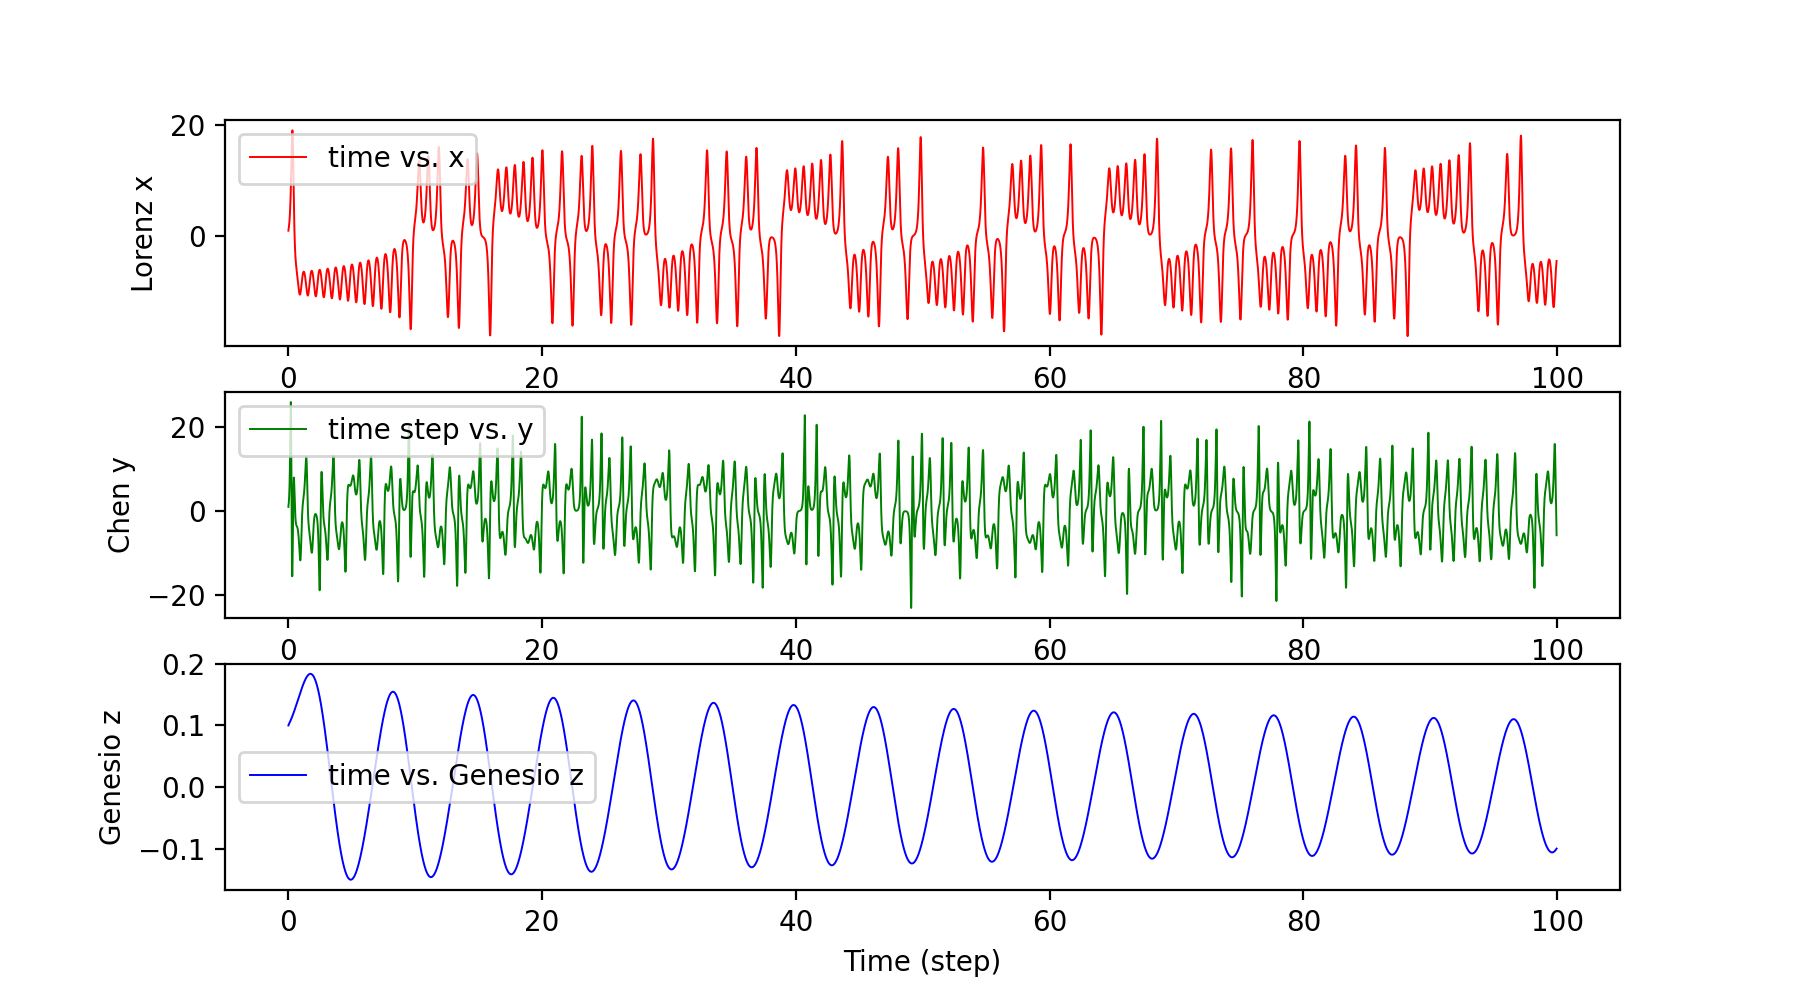

In [39]:
plt.figure("Lorenz x, Chen y, Genesio System Time Series", figsize=(9,5))

plt.subplot(311)
plt.plot(rk4_data_lorenz[:i, 3], rk4_data_lorenz[:i, 0], 
                                     color='r', label="time vs. x", linewidth='0.7')
plt.ylabel('Lorenz x')
plt.legend()

plt.subplot(312)
plt.plot(rk4_data_chen[:i, 3], rk4_data_chen[:i, 1], 
                             color='g', label="time step vs. y", linewidth='0.7')
plt.ylabel('Chen y')
plt.legend()

plt.subplot(313)
plt.plot(rk4_data_genesio[:i, 3], rk4_data_genesio[:i, 2], 
                             color='b', label="time vs. Genesio z", linewidth='0.7')
plt.ylabel('Genesio z')
plt.xlabel('Time (step)')
plt.legend()

plt.savefig('Multi_Chaotic_TSeries.png')
plt.show()

### Links:

List of chaotic maps - https://en.wikipedia.org/wiki/List_of_chaotic_maps

legendre -  https://numpy.org/doc/stable/reference/generated/numpy.polynomial.laguerre.laggauss.html#numpy.polynomial.laguerre.laggauss

legendre wiki - https://en.wikipedia.org/wiki/Legendre_polynomials

gaussian quad wiki - https://en.wikipedia.org/wiki/Gaussian_quadrature

wolfram legendre - https://mathworld.wolfram.com/Legendre-GaussQuadrature.html

### References:

[1] - https://www.sciencedirect.com/science/article/pii/S1026309812001848

[2] - https://www.sciencedirect.com/science/article/pii/S0960077905000676

[3] - https://www.hindawi.com/journals/isrn/2012/843962/

[4] - https://arxiv.org/pdf/1804.06501.pdf